In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import math
import os

In [2]:
plt.close('all')

Heights = pd.read_csv('Exp Data - Лист1.csv',sep=',',header = None)
Heights.iloc[2::2,:]

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
2,"h, nm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(w1)/2, nm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"w, nm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LP 7,"3,5","Picture 24,25",Line 401,15.03.2021,Part2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"h, nm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"25,25",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,"0,6125","321,2",NaN,"3,5",NaN,NaN,"3,5","139,65",NaN,"3,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,"1,5125","938,5",NaN,"5,5","37,25",NaN,"5,5","727,5",NaN,"5,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,"2,45",1527,NaN,"6,5",424,NaN,"6,5",1035,NaN,"6,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,"5,5125","2155,5",NaN,"7,5","844,5","982,5","7,5",1470,1451,"7,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
f = open('path.txt','r')
path_fig = f.readline().strip()
f.close()

In [4]:
Heights.iloc[2,:31]

0      h, nm
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13      16,2
14    115,35
15     147,5
16     154,6
17    158,55
18    162,45
19     157,8
20     159,5
21    144,05
22    132,05
23    107,55
24     83,05
25      70,8
26      70,3
27      61,5
28      50,7
29     43,85
30      44,6
Name: 2, dtype: object

# Разделение данных по мощности

In [5]:
num_str = Heights.shape[0] #количество строк
DF_list = []

for i in range(num_str-2):
    tmp_LP = Heights.iloc[i,1]
    test_LP = Heights.iloc[i,0]
    if type(test_LP) is str and test_LP[0:3] == 'LP ' and test_LP[0:4] != 'LP =':
        print(test_LP)
        new_name = "LP =" + str(float(tmp_LP.replace(',','.'))) + " mW"# название данных
        DF_tmp = pd.DataFrame({Heights.iloc[i+1,0]: Heights.iloc[i+1,1:31], Heights.iloc[i+2,0]: Heights.iloc[i+2,1:31]})
        DF_tmp.name = new_name
        DF_list.append(DF_tmp)

LP 6
LP 7
LP 10
LP 15
LP 21
LP 13
LP 14
LP 15
LP 12
LP 14
LP 11


In [6]:
for i in range(len(DF_list)):
    
    print(DF_list[i].name)

LP =3.0 mW
LP =3.5 mW
LP =5.0 mW
LP =7.5 mW
LP =10.5 mW
LP =6.5 mW
LP =7.0 mW
LP =7.5 mW
LP =6.0 mW
LP =7.0 mW
LP =5.5 mW


# Обработка данных

## Преобразование данных из str в float 

In [7]:
for i in range(len(DF_list)):
    len_DF = DF_list[i].shape[0]
    for k in range(len_DF):
        DF_list[i].iloc[k,0] = float(DF_list[i].iloc[k,0])
        
        str_DF = DF_list[i].iloc[k,1] # Преобразование строки с запятой в float
        if type(str_DF) is str:
            len_str_DF = len(str_DF)
            j=0
            while len_str_DF > j and str_DF[j] != ',': # Поиск индекса с запятой
                j+=1
            if j < len_str_DF-1:
                DF_list[i].iloc[k,1] = float(str_DF[:j]) + float(str_DF[j+1])/10
            else:
                DF_list[i].iloc[k,1] = float(DF_list[i].iloc[k,1])


In [8]:
DF_list[1]

,"V, mkm/s","h, nm"
1,1.0,NaN
2,2.0,NaN
3,3.0,NaN
4,4.0,NaN
5,5.0,NaN
6,6.0,NaN
7,7.0,NaN
8,8.0,NaN
9,9.0,25.2
10,10.0,107.8


In [9]:
# Удаление повторяющихся массивов данных
def clear_list(list_DF):
    set_tmp = set()
    i=0
    while i < len(list_DF):
        if list_DF[i].name not in set_tmp:
            set_tmp.add(list_DF[i].name)
        else:
            list_DF.pop(i)
            i-=1
        i+=1

In [10]:
# Сортировка данных
def sort_data(DF_list):
    for i in range(len(DF_list)):
        for j in range(len(DF_list)-i-1):
            if DF_list[j].name[4] > DF_list[j+1].name[4]:
                
                DF_list_tmp = DF_list[j]
                DF_list[j] = DF_list[j+1]
                DF_list[j+1] = DF_list_tmp

In [11]:
# Обрезка данных
def crop_data(DF_list,V_crop):
    new_DF_list = []
    for i in range(len(DF_list)):
        j=0
        while DF_list[i].iloc[j,0] < V_crop:
            j+=1
        new_DF = DF_list[i].iloc[j:,:]
        new_DF.name = DF_list[i].name
        new_DF_list.append(new_DF)
    return new_DF_list

In [12]:
clear_list(DF_list)
sort_data(DF_list)

# Визуализация данных

## h(V) при разных мощностях

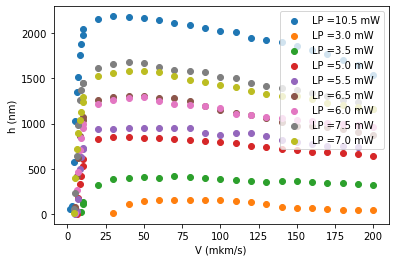

In [23]:
def visualition(DF_list,name_file,y0=None,y1=2500,x0=None,x1=210,legend_loc=None,legend_ncol=None,axs_fontsize=None):
    len_list_DF = len(DF_list)
    for i in range(len_list_DF):

        name_plot = DF_list[i].name

        plt.scatter(DF_list[i].iloc[:,0],DF_list[i].iloc[:,1], label = name_plot)
        if axs_fontsize!=None:
            plt.ylabel('h (nm)', fontsize = axs_fontsize)
            plt.xlabel('V (mkm/s)', fontsize = axs_fontsize)
            if legend_loc != None:
                if legend_ncol !=None:
                    plt.legend(loc=legend_loc,ncol=legend_ncol,fontsize = axs_fontsize*0.8)
                else:
                    plt.legend(loc=legend_loc,fontsize = axs_fontsize*0.8)
            else:
                plt.legend(fontsize = axs_fontsize-2)
        else:
            plt.ylabel('h (nm)')
            plt.xlabel('V (mkm/s)')
            if legend_loc != None:
                if legend_ncol !=None:
                    plt.legend(loc=legend_loc,ncol=legend_ncol)
                else:
                    plt.legend(loc=legend_loc)
            else:
                plt.legend()            
        if x0 !=None:
            plt.xlim([x0,x1])
        if y0 != None:
            plt.ylim([y0,y1])
#         if legend_loc != None:
#             if legend_ncol !=None:
#                 plt.legend(loc=legend_loc,ncol=legend_ncol)
#             else:
#                 plt.legend(loc=legend_loc)
#         else:
#             plt.legend()
    path = os.path.join(path_fig,name_file)
    plt.savefig(path)
    plt.show()
    
visualition(DF_list,'h_V_eng.png')

## Обрезанные по скорости (выше 50 мкм/с)

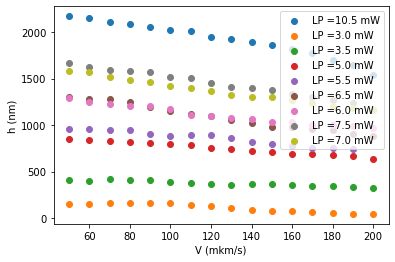

In [21]:
visualition(crop_data(DF_list,50),'h_V_crop_50_eng.png')

## Визуализация части данных

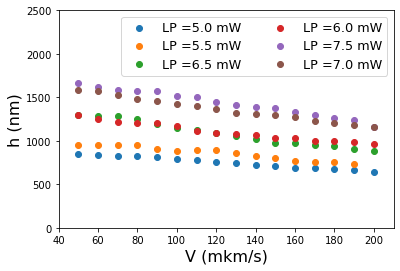

In [24]:
visualition(crop_data(DF_list[3:],50),'h_V(part)_crop_50_eng.png',x0=40,y1=2500,y0=0,legend_loc='upper right',legend_ncol=2,axs_fontsize=16)